# TWITTER SENTIMENT ANALYSIS

Twitter Sentiment Analysis is a data analytics project that involves analyzing a dataset of tweets to determine the sentiment expressed in each tweet—whether it is positive, negative, or neutral.

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, classification_report

# Data Import

Importing Data From CSV File

In [2]:
df=pd.read_csv("C:\\Users\\abhin\\Documents\\Nexus internship\\Project 2\\twitter.csv",encoding="latin",header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Allocating Headers To Columns

In [3]:
df.columns = ['Target','Id','Timestamp','Flag','User','Text']
df.head()

,Target,Id,Timestamp,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# 1.Data Exploration

Explore the Sentiment dataset to understand its structure, features and size.
Identify key variables such as tweet content, timestamp, and sentiment labels.

In [4]:
df.shape

(1600000, 6)

In [5]:
df.dtypes

Target        int64
Id            int64
Timestamp    object
Flag         object
User         object
Text         object
dtype: object

In [6]:
df.count()

Target       1600000
Id           1600000
Timestamp    1600000
Flag         1600000
User         1600000
Text         1600000
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Target     1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Timestamp  1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


# 2. Data Cleaning

Perform data cleaning tasks to handle missing values, duplicate entries, and 
irrelevant information.Ensure data quality by addressing any anomalies or inconsistencies in the 
dataset.


Missing Values

In [8]:
null_count = df.isnull().sum().sum()
null_count

0

Duplicate Entries

In [9]:
duplicate_rows = df.duplicated()
duplicate_rows.sum()

0

There is no irrelevant information in the dataset

In [10]:
df.head()

,Target,Id,Timestamp,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In timestamp PDT is not recognisable so i removed PDT from the column

In [11]:
df['Timestamp'] = df['Timestamp'].str.replace('PDT','')

In [12]:
df.head()

,Target,Id,Timestamp,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Adding extra colum labeled Sentiment which indicates '0' as Negative and '4' as Positive

In [13]:
conditions = [
    (df['Target']==0),(df['Target']==4)
]
values = ['Negative','Positive']
df['Sentiment'] = np.select(conditions,values)

In [14]:
df.head()

,Target,Id,Timestamp,Flag,User,Text,Sentiment
0,0,1467810369,Mon Apr 06 22:19:45 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,0,1467810672,Mon Apr 06 22:19:49 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Negative
2,0,1467810917,Mon Apr 06 22:19:53 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Negative
3,0,1467811184,Mon Apr 06 22:19:57 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Negative
4,0,1467811193,Mon Apr 06 22:19:57 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Negative


In [15]:
df.tail()

,Target,Id,Timestamp,Flag,User,Text,Sentiment
1599995,4,2193601966,Tue Jun 16 08:40:49 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Positive
1599996,4,2193601969,Tue Jun 16 08:40:49 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Positive
1599997,4,2193601991,Tue Jun 16 08:40:49 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Positive
1599998,4,2193602064,Tue Jun 16 08:40:49 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Positive
1599999,4,2193602129,Tue Jun 16 08:40:50 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,Positive


Data Quality is good and there are no errors,duplicates and null values

# 3. Exploratory Data Analysis (EDA)

Conduct exploratory data analysis to gain initial insights into tweet patterns, 
sentiment distributions, and temporal trends.

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['month'] = df['Timestamp'].dt.month_name()
monthly_tweets_count = df.groupby('month')['Text'].count()

In [17]:
monthly_tweets_count

month
April    100025
June     923608
May      576367
Name: Text, dtype: int64

Utilize visualizations (e.g., histograms, word clouds) to represent key aspects 
of the dataset.


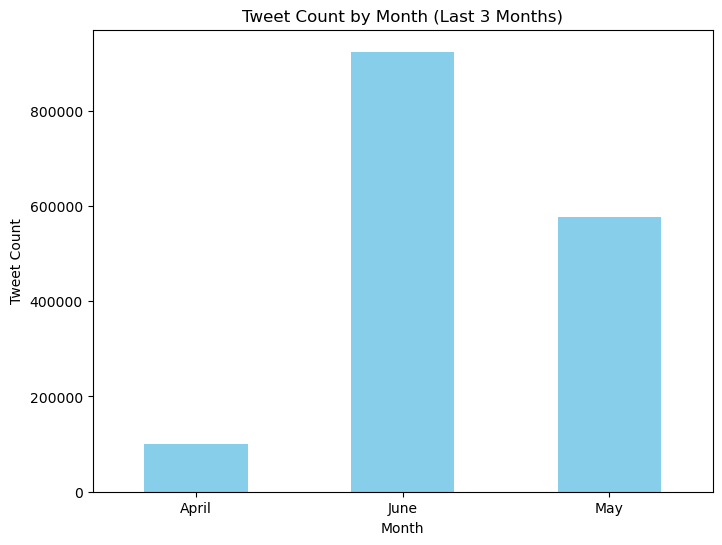

In [18]:
plt.figure(figsize=(8, 6))
monthly_tweets_count.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.title('Tweet Count by Month (Last 3 Months)')
plt.xticks(rotation=0)
plt.show()

# 4. Sentiment Distribution

Visualize the distribution of sentiment labels (positive, negative, neutral) in 
the dataset.

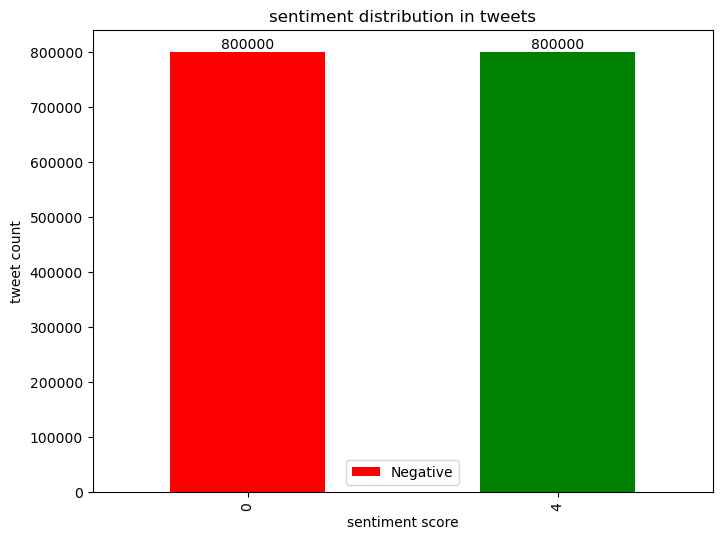

In [19]:
sentiment_counts = df['Target'].value_counts()
plt.figure(figsize=(8,6))
bars = sentiment_counts.plot(kind='bar',color=['red','green'])
for bar in bars.patches:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+0.05,round(yval, 2), ha='center', va='bottom')
plt.title('sentiment distribution in tweets')
plt.xlabel('sentiment score')
plt.ylabel('tweet count')
plt.legend(["Negative","Positive"])
plt.show()

Analyze the balance of sentiment classes to understand potential biases.


In [20]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_percentage = sentiment_counts/len(df) *100
print("sentiment class distribution:")
print(sentiment_counts)
print("\nsentiment class percentage distribution:")
print(sentiment_percentage)

sentiment class distribution:
Negative    800000
Positive    800000
Name: Sentiment, dtype: int64

sentiment class percentage distribution:
Negative    50.0
Positive    50.0
Name: Sentiment, dtype: float64


# 5. Word Frequency Analysis

Analyze the frequency of words in tweets to identify common terms and 
themes.

In [21]:
text_data = " ".join(df['Text'])
words = text_data.split()
word_freq = Counter(words)
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
word_freq_df.head(20)

,Word,Frequency
15,to,552962
40,I,496619
45,the,487501
5,a,366212
55,my,280025
30,and,275263
75,i,250016
19,is,217693
79,you,213871
44,for,209801


Bar chart for most common words

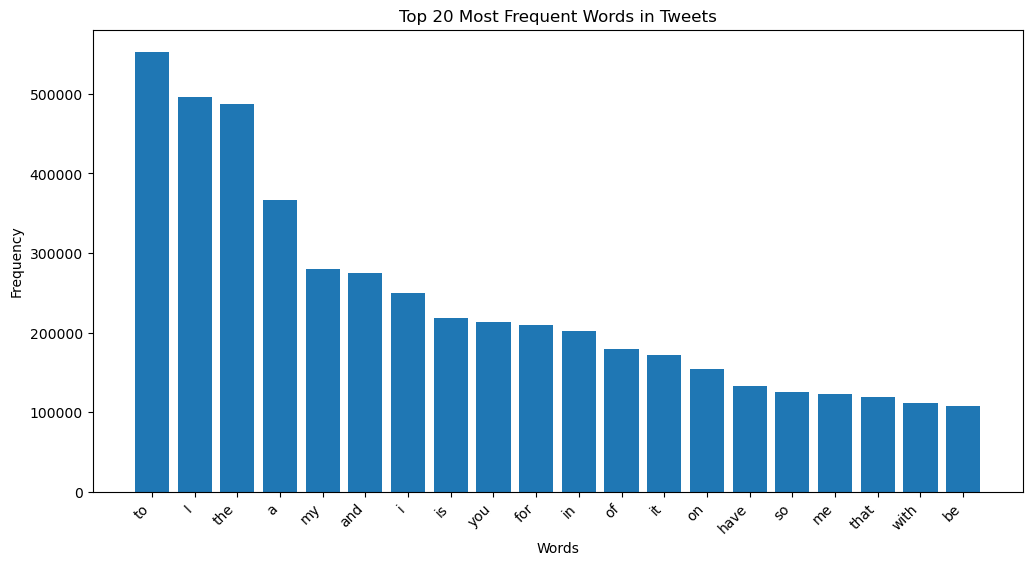

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Tweets')
plt.xticks(rotation=45, ha='right')
plt.show()

Word cloud for most common words

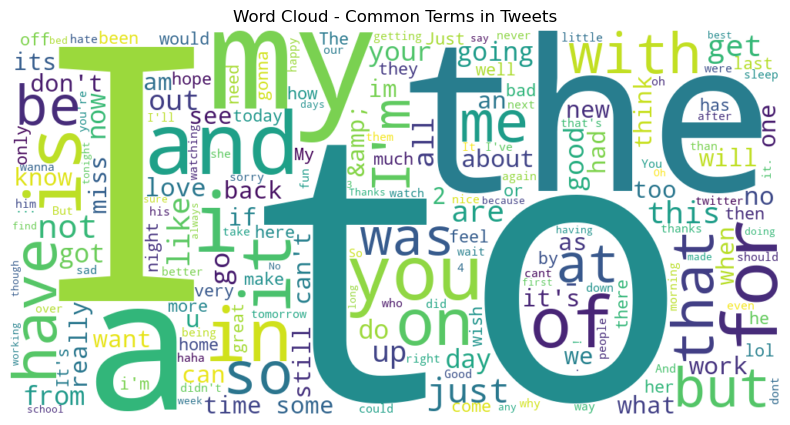

In [23]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Common Terms in Tweets')
plt.axis('off')
plt.show()

Create word clouds or bar charts to visualize the most frequent words in 
positive and negative sentiments.

In [24]:
pos_df = df[df["Sentiment"] == "Positive"]
neg_df = df[df["Sentiment"] == "Negative"]

Positive Sentiment Word Cloud

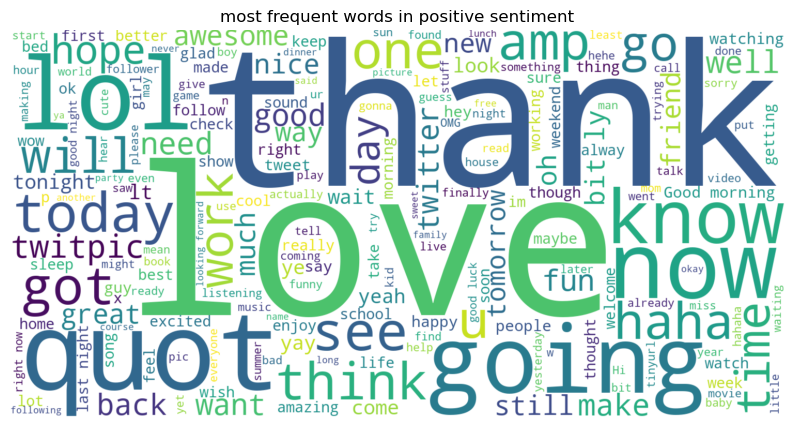

In [25]:
pos_words = " ".join(pos_df["Text"].tolist())
wordcloud = WordCloud(width=1500, height=750, background_color='white').generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('most frequent words in positive sentiment')
plt.axis('off')
plt.show()

Negative Sentiment Word Cloud

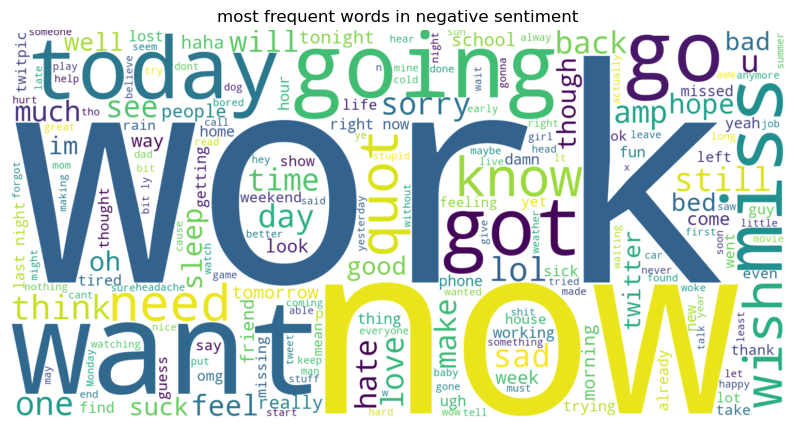

In [26]:
neg_words = " ".join(neg_df["Text"].tolist())
wordcloud = WordCloud(width=1500, height=750, background_color='white').generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('most frequent words in negative sentiment')
plt.axis('off')
plt.show()

# 6. Temporal Analysis

Explore how sentiment varies over time by analyzing tweet timestamps.

In [27]:
df['date'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df["Year"] = (df['date'].dt.year)
df["Month"] = (df['date'].dt.month)
df["Day"] = (df['date'].dt.day)
df["Hour"] = (df['date'].dt.hour)

In [28]:
Monthly_sentiment = df.groupby("Month")["Target"].value_counts().unstack()
daily_sentiment = df.groupby("Day")["Target"].mean()
Hourly_sentiment = df.groupby("Hour")["Target"].mean()

In [29]:
Monthly_sentiment

Target,0,4
Month,,
4,41607,58418
5,224822,351545
6,533571,390037


In [30]:
daily_sentiment

Day
1     2.388184
2     2.392552
3     2.398461
4     2.355272
5     2.395561
6     2.429361
7     2.405187
9     2.297300
10    2.355373
11    2.313426
13    2.252828
14    2.343852
15    2.347328
16    1.538884
17    1.270143
18    1.415630
19    0.908831
20    0.667022
21    0.949370
22    1.967543
23    0.022130
24    0.000000
25    0.019735
26    2.383002
27    2.254459
28    2.444067
29    2.404324
30    2.484504
31    2.460693
Name: Target, dtype: float64

In [31]:
Hourly_sentiment

Hour
0     2.239931
1     2.374821
2     2.368937
3     2.291409
4     2.184505
5     2.078221
6     2.017316
7     1.981782
8     1.893953
9     1.829246
10    1.917448
11    1.945483
12    1.822392
13    1.790336
14    1.850179
15    1.746500
16    1.731945
17    1.738094
18    1.799607
19    1.838398
20    1.889763
21    1.911548
22    2.007456
23    2.135410
Name: Target, dtype: float64

Identify patterns, peaks, or trends in sentiment within specific time frames.


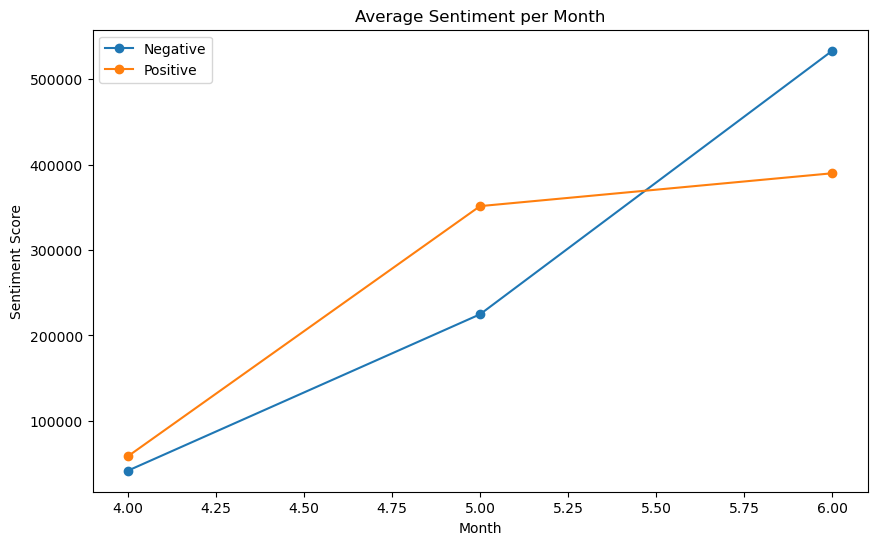

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(Monthly_sentiment.index,Monthly_sentiment, marker="o", label="Positive Sentiment")
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.title("Average Sentiment per Month")
plt.legend(["Negative","Positive"])

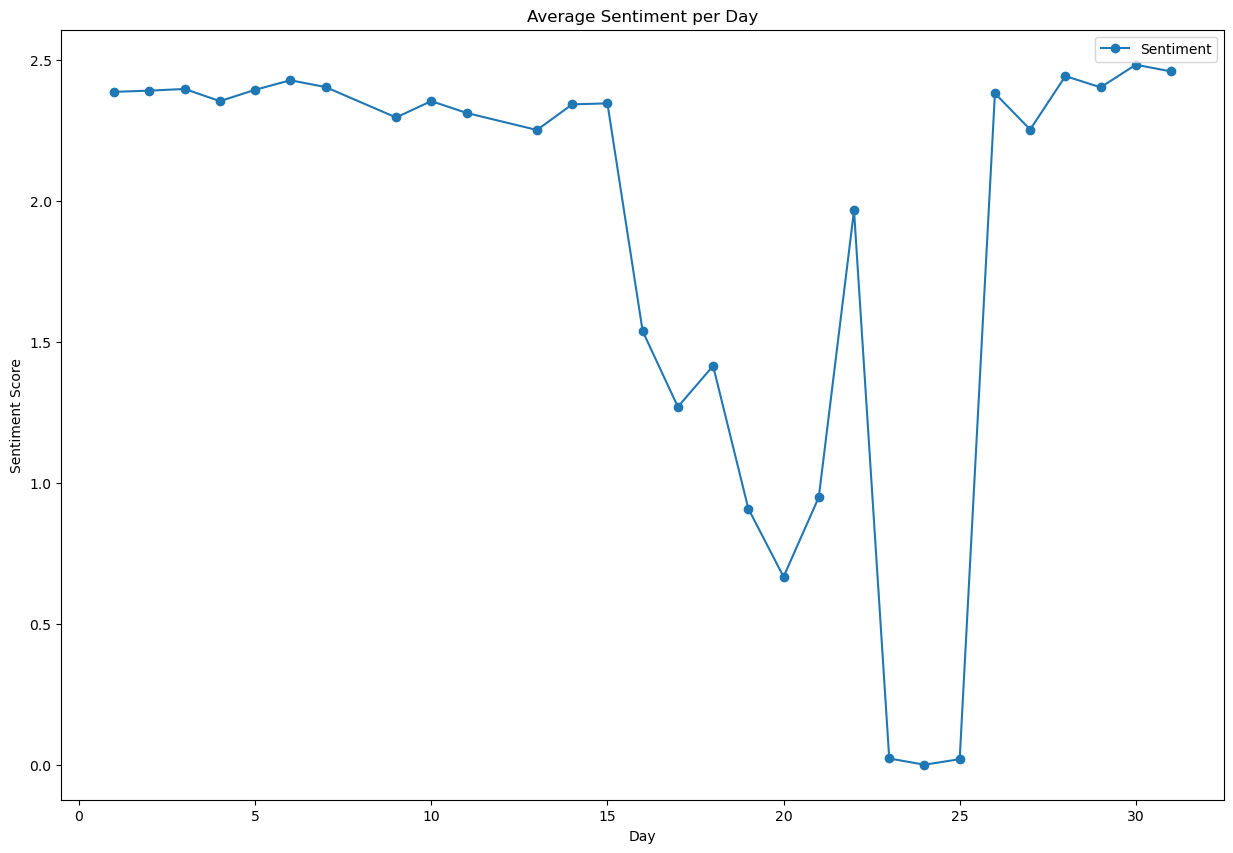

In [33]:
plt.figure(figsize=(15,10))
plt.plot(daily_sentiment.index,daily_sentiment.values, marker="o", label="Average Sentiment")
plt.xlabel("Day")
plt.ylabel("Sentiment Score")
plt.title("Average Sentiment per Day")
plt.legend(["Sentiment"])

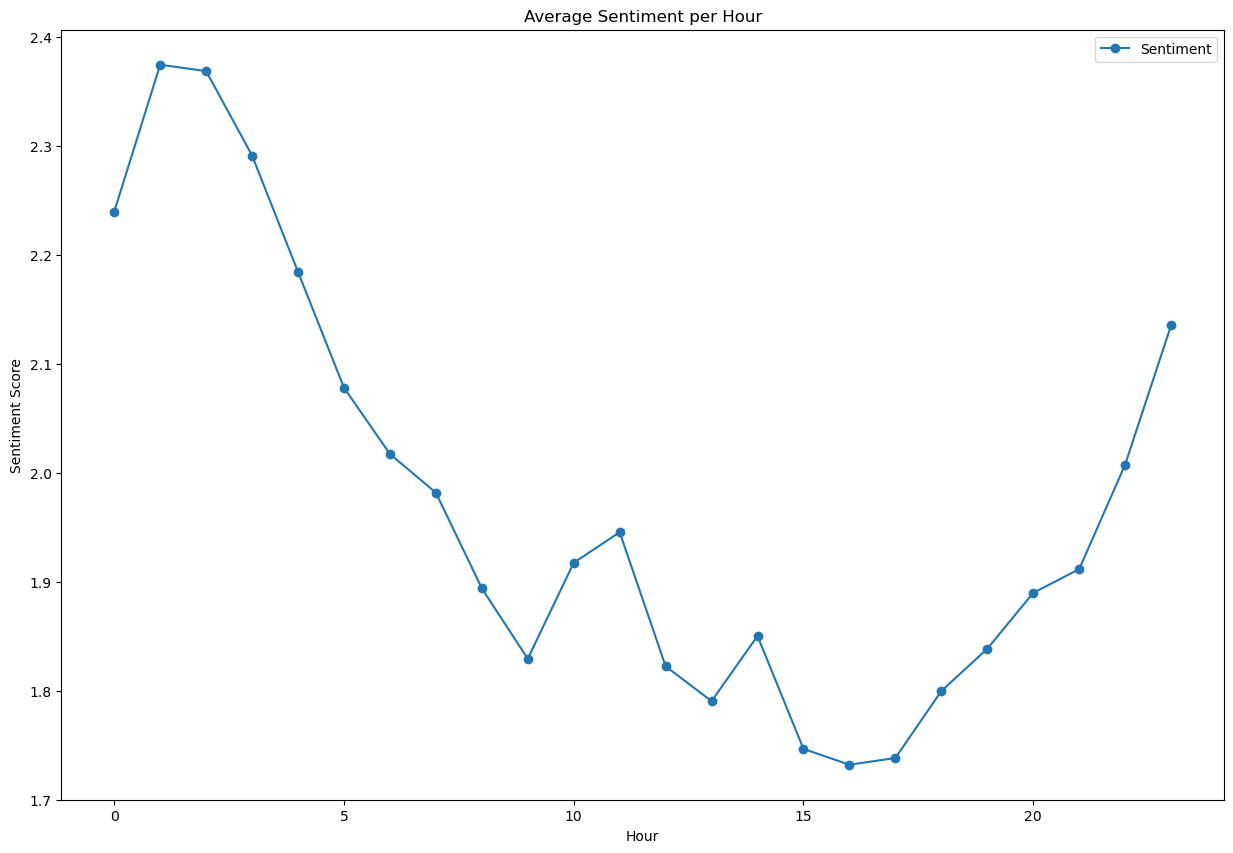

In [34]:
plt.figure(figsize=(15,10))
plt.plot(Hourly_sentiment.index, Hourly_sentiment, marker="o", label="Sentiment")
plt.xlabel("Hour")
plt.ylabel("Sentiment Score")
plt.title("Average Sentiment per Hour")
plt.legend(["Sentiment"])

# 7. Text Preprocessing

Preprocess tweet text by removing stop words, special characters, and URLs.


In [35]:
stop_words = set(stopwords.words('english'))
def clean_text(sentence):
    # Removing URLS
    sentence = re.sub(r"https?://\S+|www\.\S+"," ",sentence)
    
    # Removing html tags
    sentence = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"," ",sentence)
    
    # Removing the Punctuation
    sentence = re.sub(r"[^\w\s]", " ", sentence)
        
    # Removing words that have numbers 
    sentence = re.sub(r"\w*\d\w*", " ", sentence)
        
    # Removing Digits 
    sentence = re.sub(r"[0-9]+", " ", sentence)
        
    # Cleaning white spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()
        
    sentence = sentence.lower()
    # Check stop words
    tokens = []
    for token in sentence.split():
        if token not in stop_words:
            tokens.append(token)
    return " ".join(tokens)
df.loc[:, 'Text'] = df['Text'].apply(clean_text)

In [36]:
df.head(10)

,Target,Id,Timestamp,Flag,User,Text,Sentiment,month,date,Year,Month,Day,Hour
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,switchfoot awww bummer shoulda got david carr ...,Negative,April,2009-04-06 22:19:45,2009,4,6,22
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,Negative,April,2009-04-06 22:19:49,2009,4,6,22
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,kenichan dived many times ball managed save re...,Negative,April,2009-04-06 22:19:53,2009,4,6,22
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,Negative,April,2009-04-06 22:19:57,2009,4,6,22
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,nationwideclass behaving mad see,Negative,April,2009-04-06 22:19:57,2009,4,6,22
5,0,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,kwesidei whole crew,Negative,April,2009-04-06 22:20:00,2009,4,6,22
6,0,1467811592,2009-04-06 22:20:03,NO_QUERY,mybirch,need hug,Negative,April,2009-04-06 22:20:03,2009,4,6,22
7,0,1467811594,2009-04-06 22:20:03,NO_QUERY,coZZ,loltrish hey long time see yes rains bit bit l...,Negative,April,2009-04-06 22:20:03,2009,4,6,22
8,0,1467811795,2009-04-06 22:20:05,NO_QUERY,2Hood4Hollywood,tatiana_k nope,Negative,April,2009-04-06 22:20:05,2009,4,6,22
9,0,1467812025,2009-04-06 22:20:09,NO_QUERY,mimismo,twittera que muera,Negative,April,2009-04-06 22:20:09,2009,4,6,22


In [37]:
df.tail(10)

,Target,Id,Timestamp,Flag,User,Text,Sentiment,month,date,Year,Month,Day,Hour
1599990,4,2193579249,2009-06-16 08:38:59,NO_QUERY,razzberry5594,wooooo xbox back,Positive,June,2009-06-16 08:38:59,2009,6,16,8
1599991,4,2193579284,2009-06-16 08:38:59,NO_QUERY,AgustinaP,rmedina latati mmmm sounds absolutely perfect ...,Positive,June,2009-06-16 08:38:59,2009,6,16,8
1599992,4,2193579434,2009-06-16 08:39:00,NO_QUERY,sdancingsteph,recovering long weekend,Positive,June,2009-06-16 08:39:00,2009,6,16,8
1599993,4,2193579477,2009-06-16 08:39:00,NO_QUERY,ChloeAmisha,scooby_gritboys,Positive,June,2009-06-16 08:39:00,2009,6,16,8
1599994,4,2193579489,2009-06-16 08:39:00,NO_QUERY,EvolveTom,cliff_forster yeah work better waiting end won...,Positive,June,2009-06-16 08:39:00,2009,6,16,8
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,woke school best feeling ever,Positive,June,2009-06-16 08:40:49,2009,6,16,8
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,thewdb com cool hear old walt interviews â,Positive,June,2009-06-16 08:40:49,2009,6,16,8
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,ready mojo makeover ask details,Positive,June,2009-06-16 08:40:49,2009,6,16,8
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,happy birthday boo alll time tupac amaru shakur,Positive,June,2009-06-16 08:40:49,2009,6,16,8
1599999,4,2193602129,2009-06-16 08:40:50,NO_QUERY,RyanTrevMorris,happy charitytuesday thenspcc sparkscharity,Positive,June,2009-06-16 08:40:50,2009,6,16,8


Tokenize and lemmatize words to prepare the text for sentiment analysis.


# Tokenization

In [38]:
use_word_tokens=True
def tokenize_text(text):
    if use_word_tokens:
        return word_tokenize(text)
    elif use_n_grams:
        return list(nltk.ngrams(text.split(), n))
    else:
        return nltk.sent_tokenize(text)
df['Text'].apply(tokenize_text)

0          [switchfoot, awww, bummer, shoulda, got, david...
1          [upset, update, facebook, texting, might, cry,...
2          [kenichan, dived, many, times, ball, managed, ...
3                    [whole, body, feels, itchy, like, fire]
4                      [nationwideclass, behaving, mad, see]
                                 ...                        
1599995                  [woke, school, best, feeling, ever]
1599996    [thewdb, com, cool, hear, old, walt, interview...
1599997                [ready, mojo, makeover, ask, details]
1599998    [happy, birthday, boo, alll, time, tupac, amar...
1599999     [happy, charitytuesday, thenspcc, sparkscharity]
Name: Text, Length: 1600000, dtype: object

# Lemmatization

In [39]:
wnl = WordNetLemmatizer()
def lemmatize_words(text):
    word_tokens= text.split()
    lemmas = [wnl.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas
df['lemma_text'] = df['Text'].apply(lemmatize_words)

In [40]:
df.get('lemma_text')

0          [switchfoot, awww, bummer, shoulda, get, david...
1          [upset, update, facebook, texting, might, cry,...
2          [kenichan, dive, many, time, ball, manage, sav...
3                     [whole, body, feel, itchy, like, fire]
4                        [nationwideclass, behave, mad, see]
                                 ...                        
1599995                     [wake, school, best, feel, ever]
1599996    [thewdb, com, cool, hear, old, walt, interview...
1599997                 [ready, mojo, makeover, ask, detail]
1599998    [happy, birthday, boo, alll, time, tupac, amar...
1599999     [happy, charitytuesday, thenspcc, sparkscharity]
Name: lemma_text, Length: 1600000, dtype: object

# 8. Sentiment Prediction Model

Implement a sentiment prediction model using machine learning or natural 
language processing techniques.

In [41]:
tweet = df.drop(['Id','Timestamp','Flag','User','month','date','Year','Month','Day','Hour','lemma_text'], axis=1)

In [42]:
tweet.head()

,Target,Text,Sentiment
0,0,switchfoot awww bummer shoulda got david carr ...,Negative
1,0,upset update facebook texting might cry result...,Negative
2,0,kenichan dived many times ball managed save re...,Negative
3,0,whole body feels itchy like fire,Negative
4,0,nationwideclass behaving mad see,Negative


In [43]:
tweet.tail()

,Target,Text,Sentiment
1599995,4,woke school best feeling ever,Positive
1599996,4,thewdb com cool hear old walt interviews â,Positive
1599997,4,ready mojo makeover ask details,Positive
1599998,4,happy birthday boo alll time tupac amaru shakur,Positive
1599999,4,happy charitytuesday thenspcc sparkscharity,Positive


I created two models one is trained and tested with index number to get sentiment and another model is trained and tested with words in tweet text 

# Model - 1

In [44]:
x= tweet['Text'].values
y = tweet['Target'].values

In [45]:
x

array(['switchfoot\xa0awww\xa0bummer\xa0shoulda\xa0got\xa0david\xa0carr\xa0third\xa0day',
       'upset\xa0update\xa0facebook\xa0texting\xa0might\xa0cry\xa0result\xa0school\xa0today\xa0also\xa0blah',
       'kenichan\xa0dived\xa0many\xa0times\xa0ball\xa0managed\xa0save\xa0rest\xa0go\xa0bounds',
       ..., 'ready\xa0mojo\xa0makeover\xa0ask\xa0details',
       'happy\xa0birthday\xa0boo\xa0alll\xa0time\xa0tupac\xa0amaru\xa0shakur',
       'happy\xa0charitytuesday\xa0thenspcc\xa0sparkscharity'],
      dtype=object)

In [46]:
y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

Train the model on a subset of the dataset

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [48]:
print(x.shape,x_train.shape,x_test.shape)

(1600000,) (1280000,) (320000,)


In [49]:
vectorizer = TfidfVectorizer()

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [50]:
model1 = LogisticRegression(max_iter=1000)

In [51]:
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Evaluate its performance using 
metrics like accuracy

In [52]:
x_train_prediction = model1.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)

In [53]:
print('Accuracy score on the training data :', training_data_accuracy*100)

Accuracy score on the training data : 81.567109375


In [54]:
x_test_prediction = model1.predict(x_test)
testing_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [55]:
print('Accuracy score on the training data :', testing_data_accuracy*100)

Accuracy score on the training data : 78.275625


# Testing

In [56]:
x_new = x_test[100]
print(y_test[100])

4


In [57]:
prediction = model1.predict(x_new)
print(prediction)

if (prediction == 0):
    print('Negative tweet')
else:
    print('Positive tweet')

[4]
Positive tweet


In [58]:
x_new = x_test[148]
print(y_test[148])

0


In [59]:
prediction = model1.predict(x_new)
print(prediction)

if (prediction == 0):
    print('Negative tweet')
else:
    print('Positive tweet')

[0]
Negative tweet


In [60]:
x_new = x_test[109]
print(y_test[109])

4


In [61]:
prediction = model1.predict(x_new)
print(prediction)

if (prediction == 0):
    print('Negative tweet')
else:
    print('Positive tweet')

[4]
Positive tweet


Model 1 Accuracy score = 78.23%

# Model - 2

In [62]:
x=tweet['Text'].values
y=tweet['Sentiment'].values

In [63]:
x

array(['switchfoot\xa0awww\xa0bummer\xa0shoulda\xa0got\xa0david\xa0carr\xa0third\xa0day',
       'upset\xa0update\xa0facebook\xa0texting\xa0might\xa0cry\xa0result\xa0school\xa0today\xa0also\xa0blah',
       'kenichan\xa0dived\xa0many\xa0times\xa0ball\xa0managed\xa0save\xa0rest\xa0go\xa0bounds',
       ..., 'ready\xa0mojo\xa0makeover\xa0ask\xa0details',
       'happy\xa0birthday\xa0boo\xa0alll\xa0time\xa0tupac\xa0amaru\xa0shakur',
       'happy\xa0charitytuesday\xa0thenspcc\xa0sparkscharity'],
      dtype=object)

In [64]:
y

array(['Negative', 'Negative', 'Negative', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

Train the model on a subset of the dataset

In [65]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
model2 = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [67]:
model2.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [68]:
predictions = model2.predict(x_test)

In [69]:
accuracy = accuracy_score(y_test, predictions)

In [70]:
print(f"model accuracy : {accuracy*100:.2f}%")

model accuracy : 76.37%


# Testing

In [71]:
new_text = "love my brother"
prediction = model2.predict([new_text])[0]
print(f"Predicted Tweet: {prediction} Tweet")

Predicted Tweet: Positive Tweet


In [72]:
new_text = "dive many times for ball and drowned"
prediction = model2.predict([new_text])[0]
print(f"Predicted Tweet: {prediction} Tweet")

Predicted Tweet: Negative Tweet


In [73]:
new_text = "Happy birthday"
prediction = model2.predict([new_text])[0]
print(f"Predicted Tweet: {prediction} Tweet")

Predicted Tweet: Positive Tweet


In [74]:
new_text = "i might cry"
prediction = model2.predict([new_text])[0]
print(f"Predicted Tweet: {prediction} Tweet")

Predicted Tweet: Negative Tweet


Evaluate its performance using 
metrics like accuracy and F1 score.

Accuracy

In [75]:
print(f"Model accuracy : {accuracy*100:.2f}%")

Model accuracy : 76.37%


F1 Score

In [76]:
f1 = f1_score(y_test,predictions,average='weighted')
print(f"F1 score :{f1*100:.2f}")

F1 score :76.35


In [77]:
report  = classification_report(y_test,predictions)
print("Classification report:\n",report)

Classification report:
               precision    recall  f1-score   support

    Negative       0.75      0.79      0.77    159494
    Positive       0.78      0.73      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



# 9. Feature Importance

Identify the most important features (words or phrases) contributing to 
sentiment predictions.


In [78]:
vectorizer = model2.named_steps['tfidfvectorizer']
classifier = model2.named_steps['multinomialnb']
feature_names = vectorizer.get_feature_names_out()
log_probs = classifier.feature_log_prob_[0]
feature_log_probs = dict(zip(feature_names,log_probs))
sorted_features = sorted(feature_log_probs.items(),key= lambda x: x[1],reverse=True)
top_features_count = 20
print(f"Top {top_features_count} features: ")
for feature,log_prob in sorted_features[:top_features_count]:
    print(f"{feature} : {log_prob*-1:.2f}")

Top 20 features: 
work : 5.38
go : 5.58
get : 5.70
today : 5.72
day : 5.73
miss : 5.76
like : 5.81
want : 5.82
back : 5.84
sad : 5.85
going : 5.86
really : 5.87
still : 5.94
got : 5.96
im : 5.97
home : 6.01
wish : 6.07
know : 6.09
good : 6.09
feel : 6.10


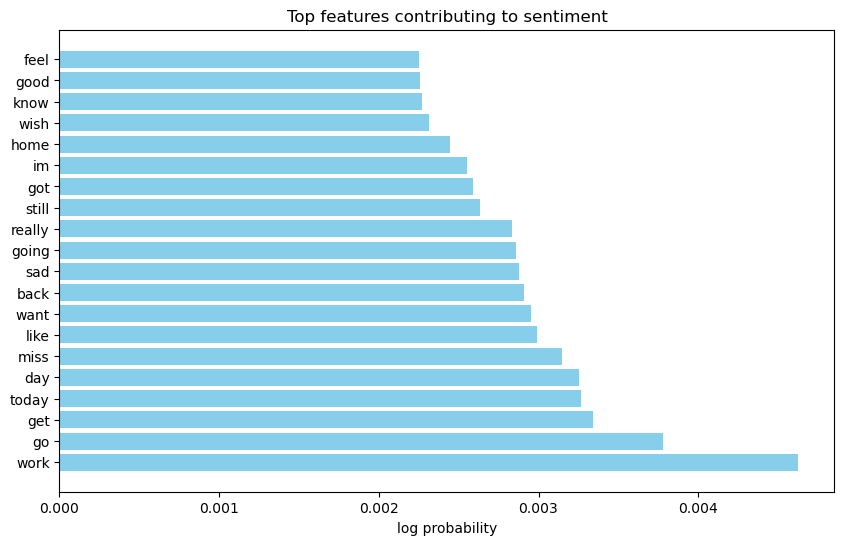

In [79]:
probabilities = np.exp(log_probs)
sorted_features = sorted(zip(feature_names,probabilities), key=lambda x: x[1],reverse=True)
top_features = [feature[0] for feature in sorted_features[:top_features_count]]
top_log_probs = [feature[1] for feature in sorted_features[:top_features_count]]
plt.figure(figsize=(10,6))
plt.barh(top_features,top_log_probs, color='skyblue')
plt.xlabel('log probability')
plt.title('Top features contributing to sentiment')
plt.show()

Text(0.5, 1.0, 'word cloud of features contributing to sentiment')

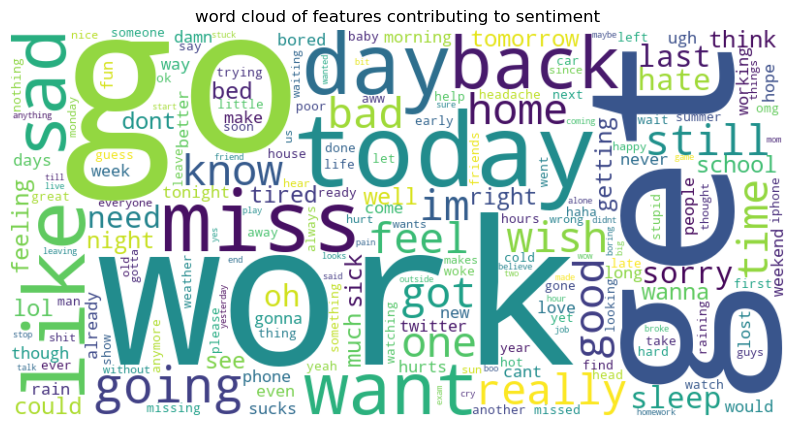

In [80]:
wordcloud = WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(feature_log_probs)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('word cloud of features contributing to sentiment')